In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mpl.rcParams['figure.dpi'] = 200

Data importing and visualization functions

In [64]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    print(linkage_matrix.shape)
    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

In [65]:
def visualize_ptable(labels:np.ndarray):
    visualization = pd.read_csv("hw3_visualization.csv")
    fig = plt.figure(figsize=(18,5))
    plt.scatter(visualization["group"],6-visualization["period"],c = labels,s = 1500,marker='s',cmap='Pastel1')
    plt.ylim((0,6))
    plt.xlabel("Group")
    plt.ylabel("Period")
    for i, element in enumerate(visualization["Element"]):
        plt.annotate(element,(visualization["group"][i],6-visualization["period"][i]),horizontalalignment="center") 

In [66]:
data = pd.read_csv("HW3.csv")
labels = data["Element"]
data = data.drop("Element",axis=1)
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)
print(data.shape)
visualization = pd.read_csv("hw3_visualization.csv")

(54, 39)


Heirarchical clustering analysis

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [35.0, 35.0, 53.75, 53.75],
  [25.0, 25.0, 44.375, 44.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [120.0, 120.0, 151.875, 151.875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [135.9375, 135.9375, 202.5, 202.5],
  [92.5, 92.5, 169.21875, 169.21875],
  [34.6875, 34.6875, 130.859375, 130.859375],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [82.7734375, 82.7734375, 240.0, 240.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [335.0, 335.0, 345.0, 345.0],
  [365

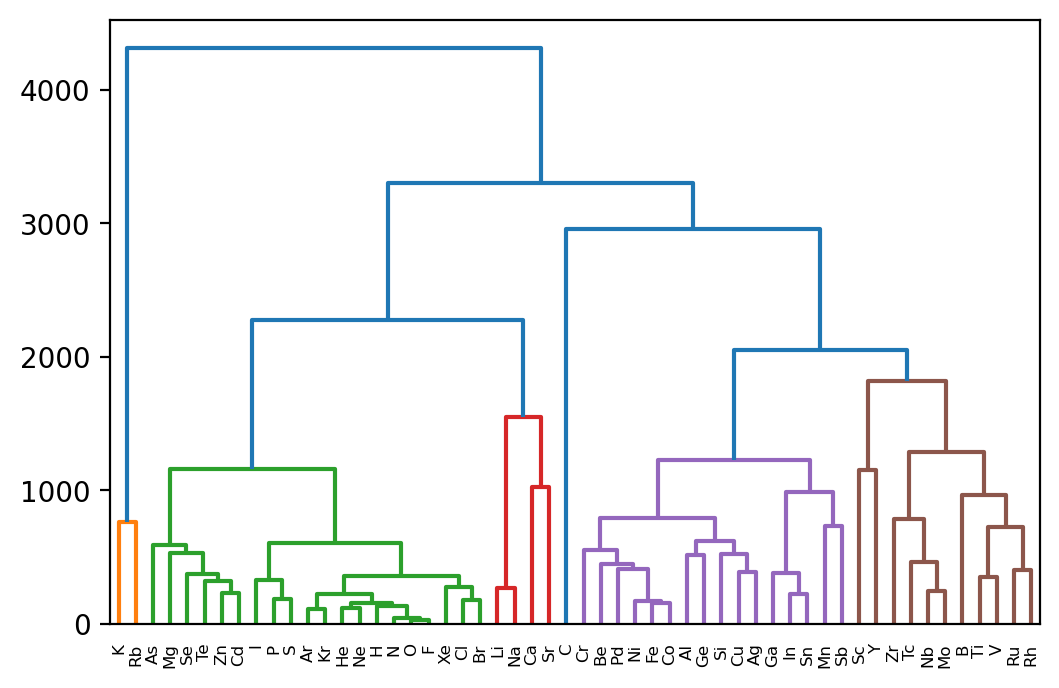

In [67]:
#Testing out the scipy implementation of heirarchical clustering
linkages = linkage(data,method="average")
dendrogram(linkages, color_threshold=2000, labels=visualization["Element"].to_numpy())

(53, 4)


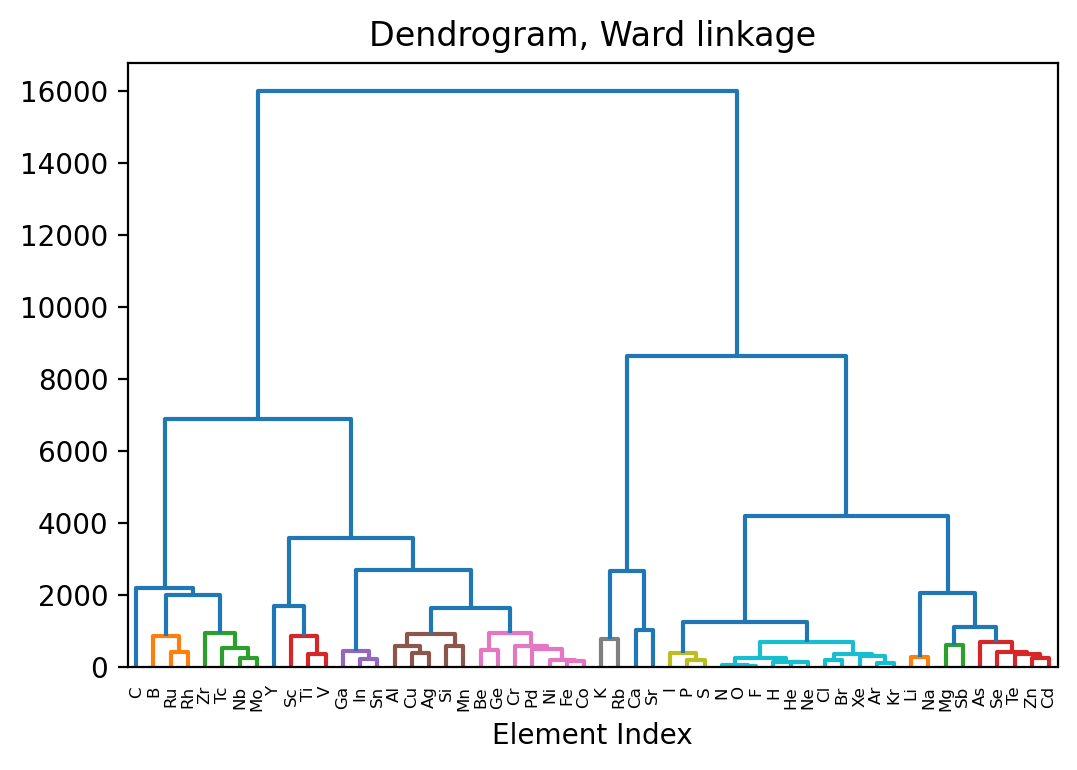

In [68]:
clustermodel = AgglomerativeClustering(distance_threshold=0,n_clusters=None, compute_distances=True)
model = clustermodel.fit(data)
# plot the top three levels of the dendrogram
plot_dendrogram(model, labels=visualization["Element"].to_numpy(),color_threshold=1000)
plt.title("Dendrogram, Ward linkage")
plt.xlabel("Element Index")
plt.show()

(53, 4)


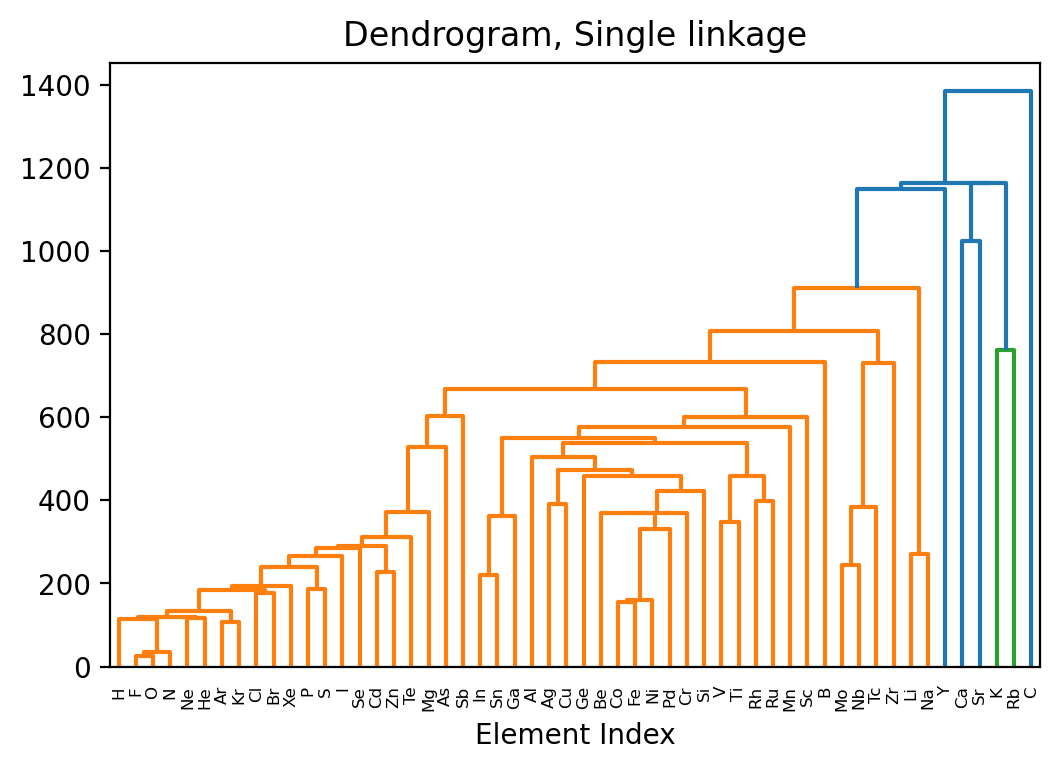

In [69]:
clustermodel = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage="single")
model = clustermodel.fit(data)
# plot the top three levels of the dendrogram
plot_dendrogram(model, labels=visualization["Element"].to_numpy())
plt.title("Dendrogram, Single linkage")
plt.xlabel("Element Index")
plt.show()

(53, 4)


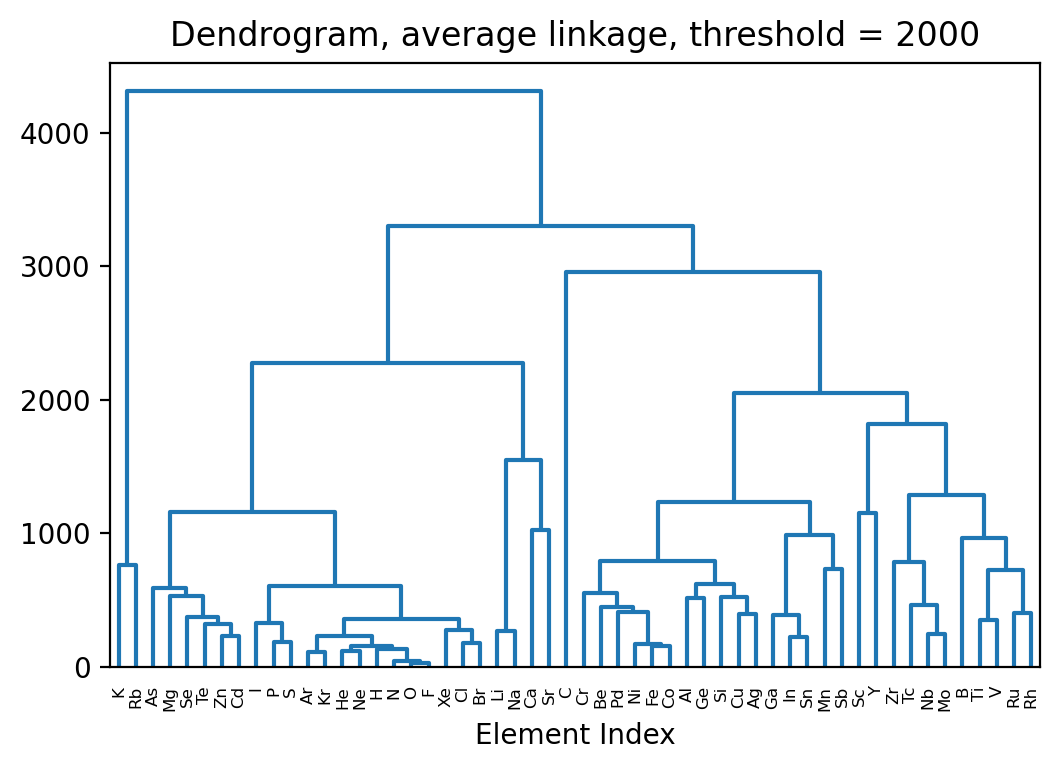

In [70]:
clustermodel = AgglomerativeClustering(distance_threshold=10,n_clusters=None,linkage = "average")
model = clustermodel.fit(data)
# plot the top three levels of the dendrogram
results = plot_dendrogram(model,labels=visualization["Element"].to_numpy(),color_threshold=1.8)
plt.title("Dendrogram, average linkage, threshold = 2000")
plt.xlabel("Element Index")
plt.show()

<bound method NDFrame.head of     element_number label
15               0    C0
13               1    C0
22               2    C0
28               3    C0
49               4    C0
26               5    C0
16               6    C0
17               7    C0
18               8    C0
14               9    C0
23              10    C0
3               11    C0
33              12    C0
35              13    C0
9               14    C0
10              15    C0
20              16    C0
11              17    C0
0               18    C0
24              19    C0
43              20    C0
50              21    C0
51              22    C0
27              23    C0
41              24    C0
31              25    C0
32              26    C0
30              27    C0
36              28    C0
6               29    C0
38              30    C0
34              31    C0
2               32    C0
4               33    C0
21              34    C0
12              35    C0
1               36    C0
25              37  

Text(0.5, 1.0, 'Dendrogram Average linkage, threshold = 2000')

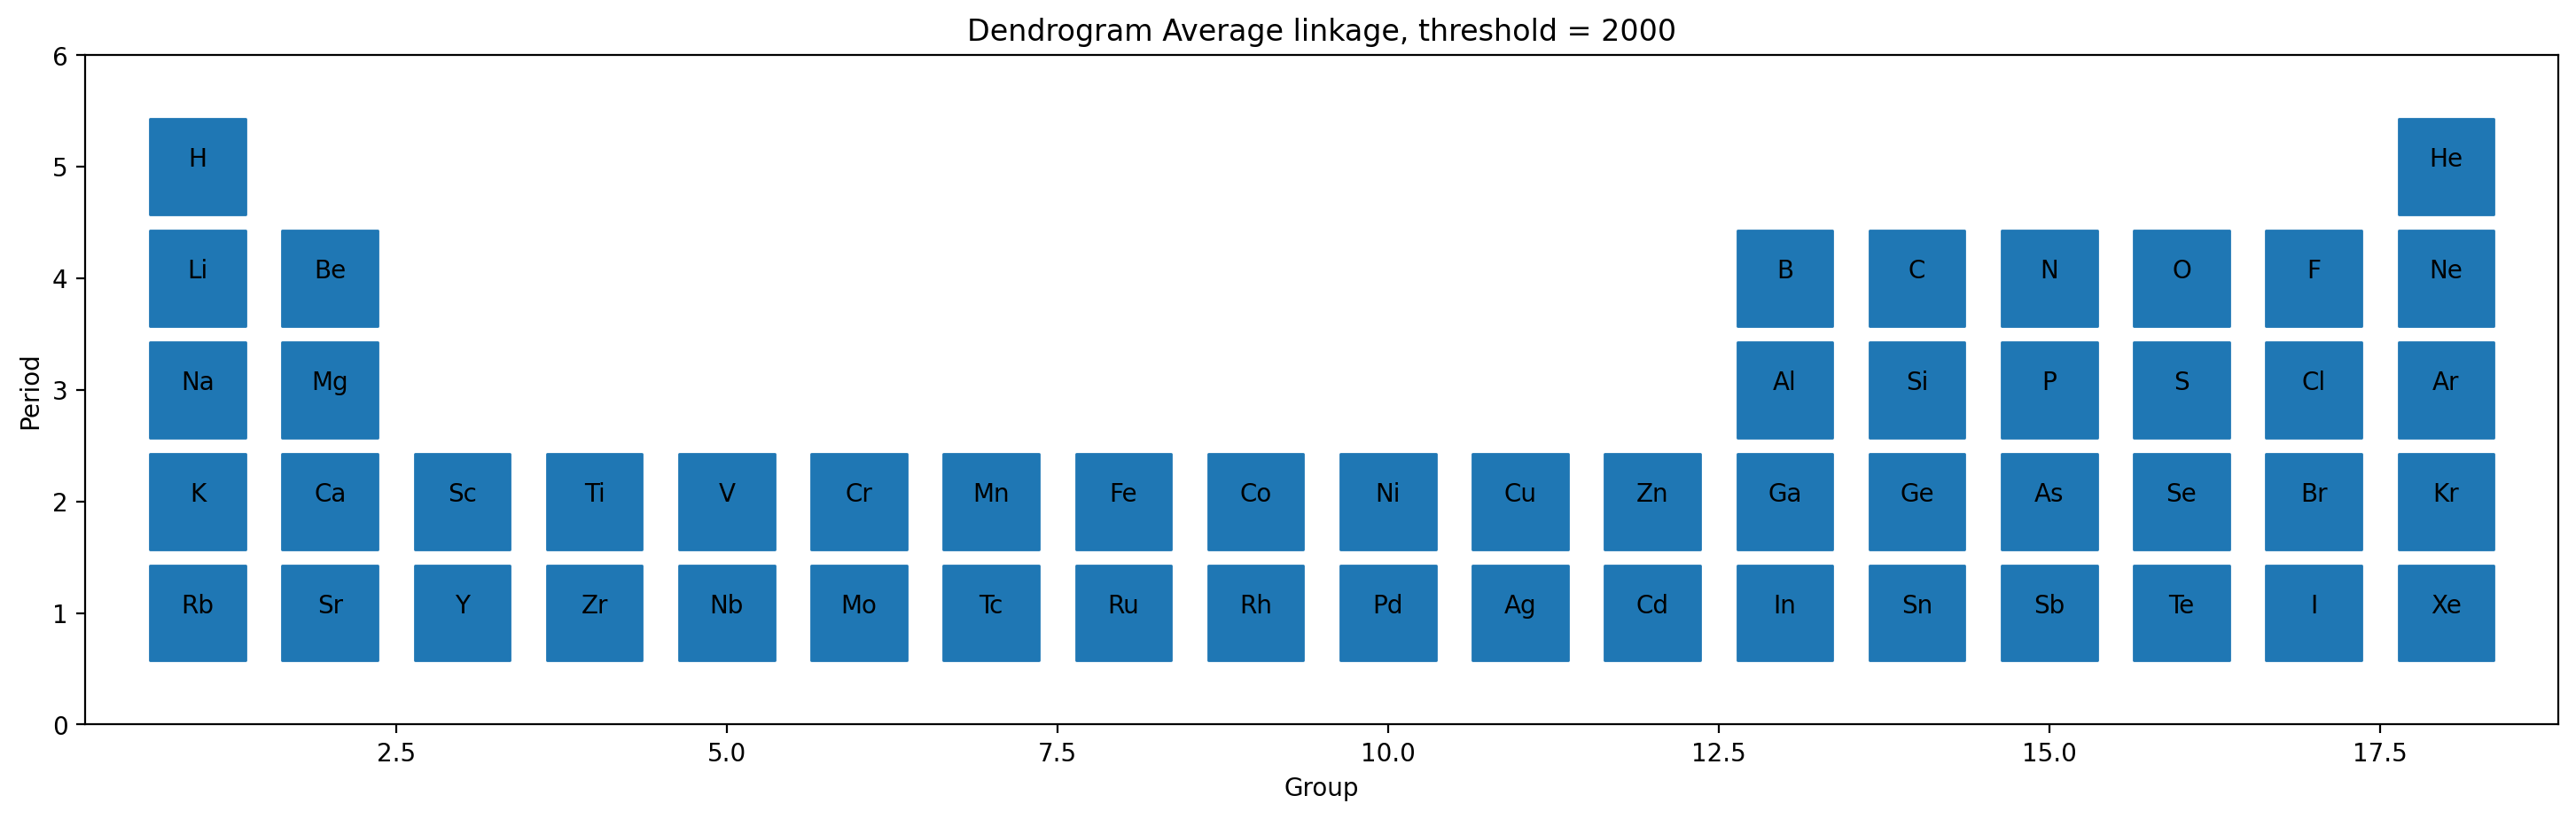

In [71]:
dendrogram_results = pd.DataFrame({
    'element_number': results['leaves'],
    'label': results["leaves_color_list"]
})

dendrogram_results = dendrogram_results.sort_values(by=['element_number'])
print(dendrogram_results.head)
visualize_ptable(dendrogram_results["label"])
plt.title("Dendrogram Average linkage, threshold = 2000")

(53, 4)


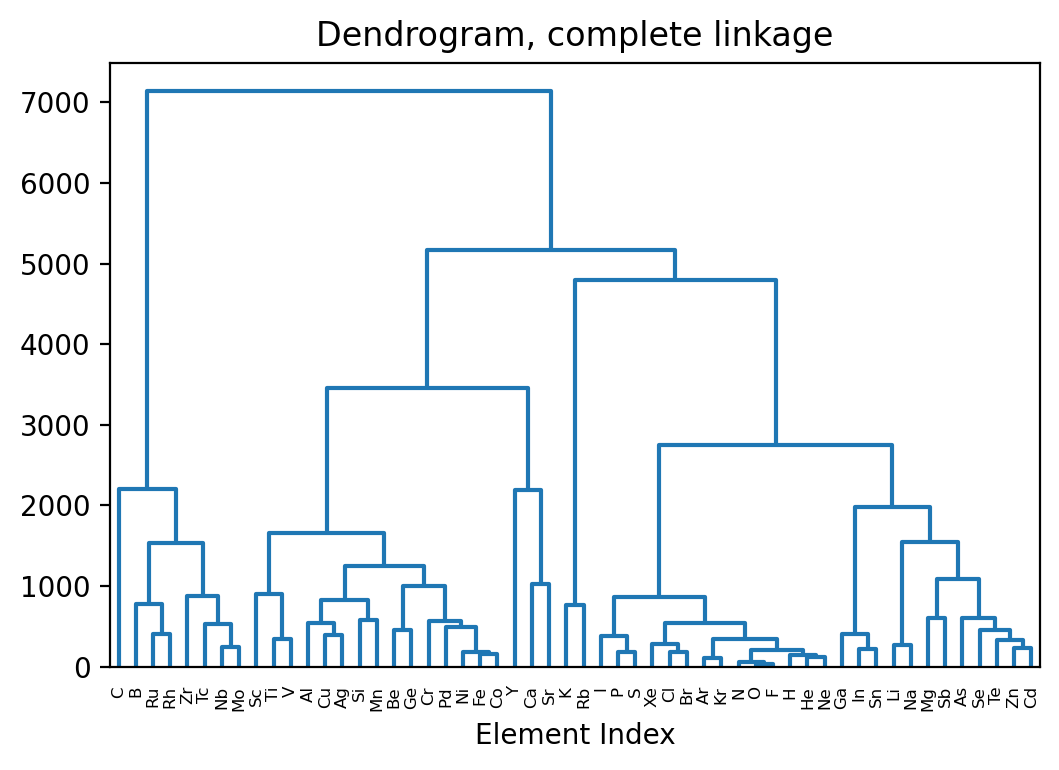

In [72]:
clustermodel = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage = "complete")
model = clustermodel.fit(data)
# plot the top three levels of the dendrogram
results = plot_dendrogram(model,labels=visualization["Element"].to_numpy(), color_threshold=2.5)
plt.title("Dendrogram, complete linkage")
plt.xlabel("Element Index")
plt.show()

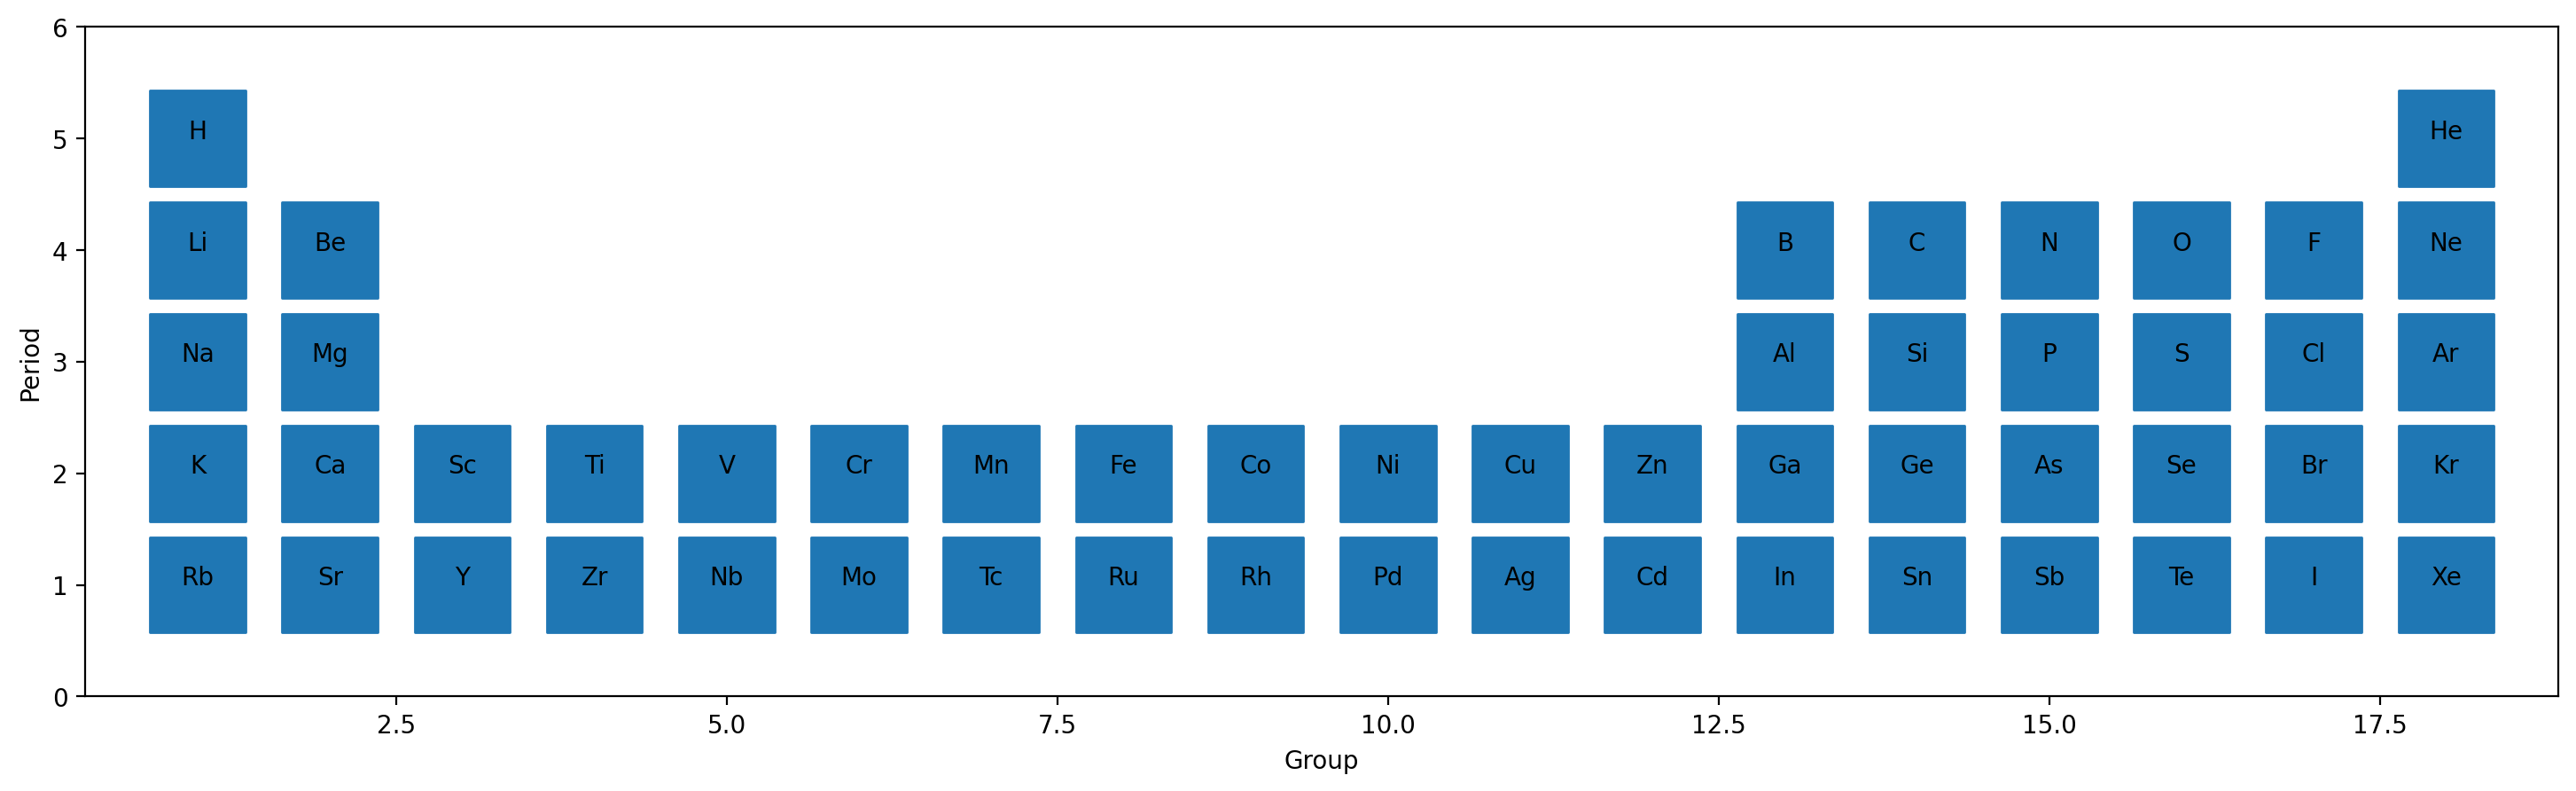

In [73]:
dendrogram_results = pd.DataFrame({
    'element_number': results['leaves'],
    'label': results["leaves_color_list"]
})

dendrogram_results = dendrogram_results.sort_values(by=['element_number'])
visualize_ptable(dendrogram_results["label"])

K-means clustering analysis

In [74]:
klist = np.arange(2,40,dtype=int)
average_s_score = np.zeros(klist.shape)
inertia_list = np.zeros(klist.shape)

for i, kval in enumerate(klist):
    kmeans = KMeans(n_clusters=kval, random_state=123)
    results = kmeans.fit(data)
    s_scores = silhouette_samples(data,results.labels_)
    average_s_score[i] = np.average(s_scores)
    inertia_list[i] = results.inertia_



Text(0.5, 0, 'Number of clusters')

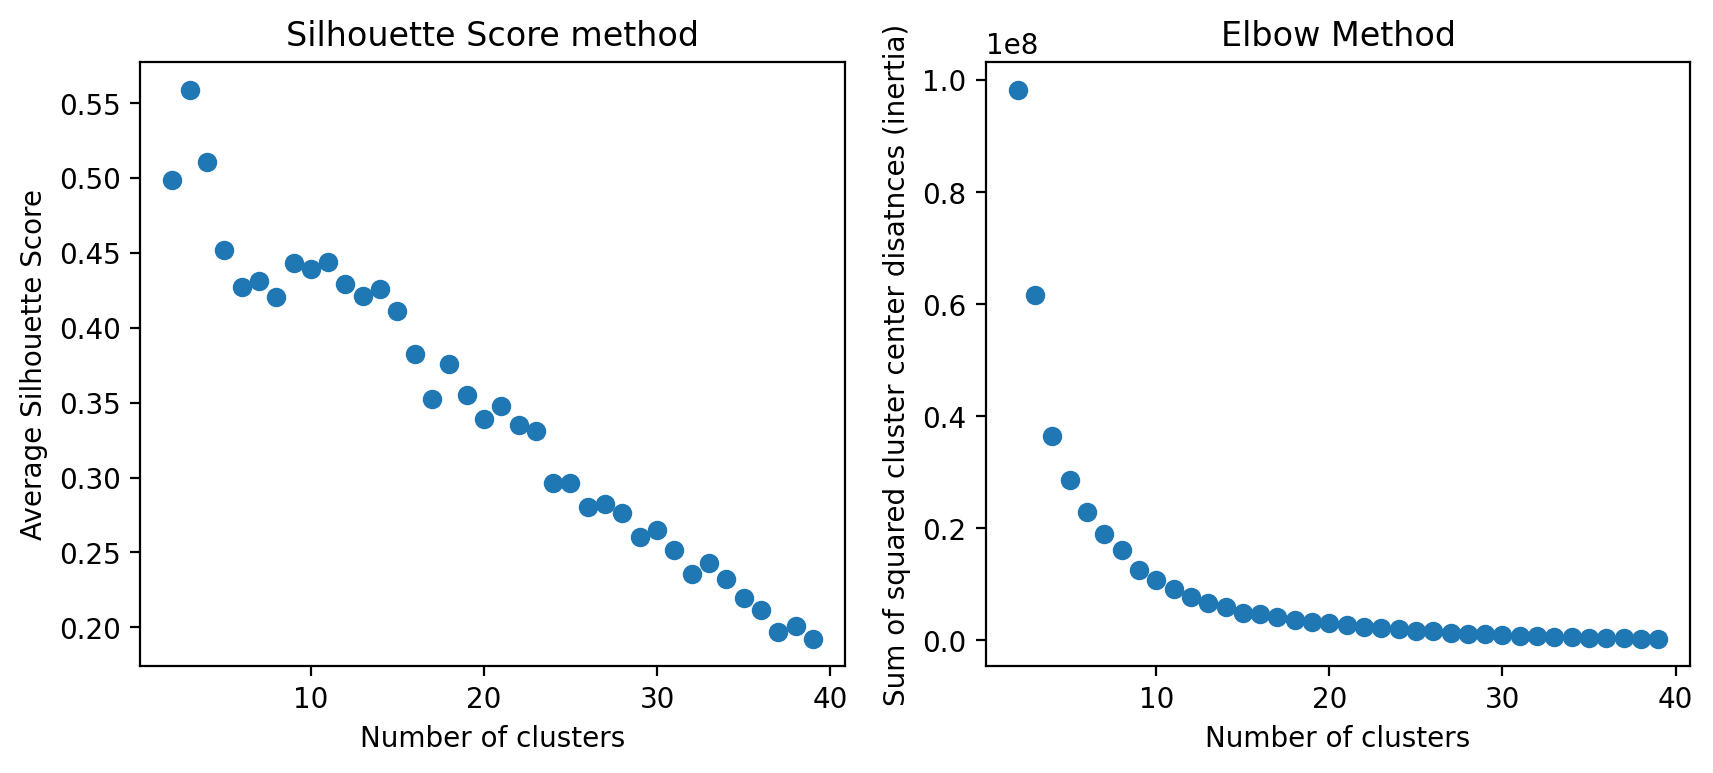

In [75]:
fig, axs = plt.subplots(ncols=2,figsize=(10,4))
axs[0].set_title("Silhouette Score method")
axs[0].set_ylabel("Average Silhouette Score")
axs[0].set_xlabel("Number of clusters")
axs[0].scatter(klist, average_s_score)

axs[1].scatter(klist, inertia_list)
axs[1].set_title("Elbow Method")
axs[1].set_ylabel("Sum of squared cluster center disatnces (inertia)")
axs[1].set_xlabel("Number of clusters")

In [76]:
def visualize_ptable(labels:np.ndarray):
    visualization = pd.read_csv("hw3_visualization.csv")
    fig = plt.figure(figsize=(18,5))
    plt.scatter(visualization["group"],6-visualization["period"],c = labels,s = 1500,marker='s',cmap='Pastel1')
    plt.ylim((0,6))
    plt.xlabel("Group")
    plt.ylabel("Period")
    for i, element in enumerate(visualization["Element"]):
        plt.annotate(element,(visualization["group"][i],6-visualization["period"][i]),horizontalalignment="center")


    

Text(0.5, 1.0, 'n_clusters=4')

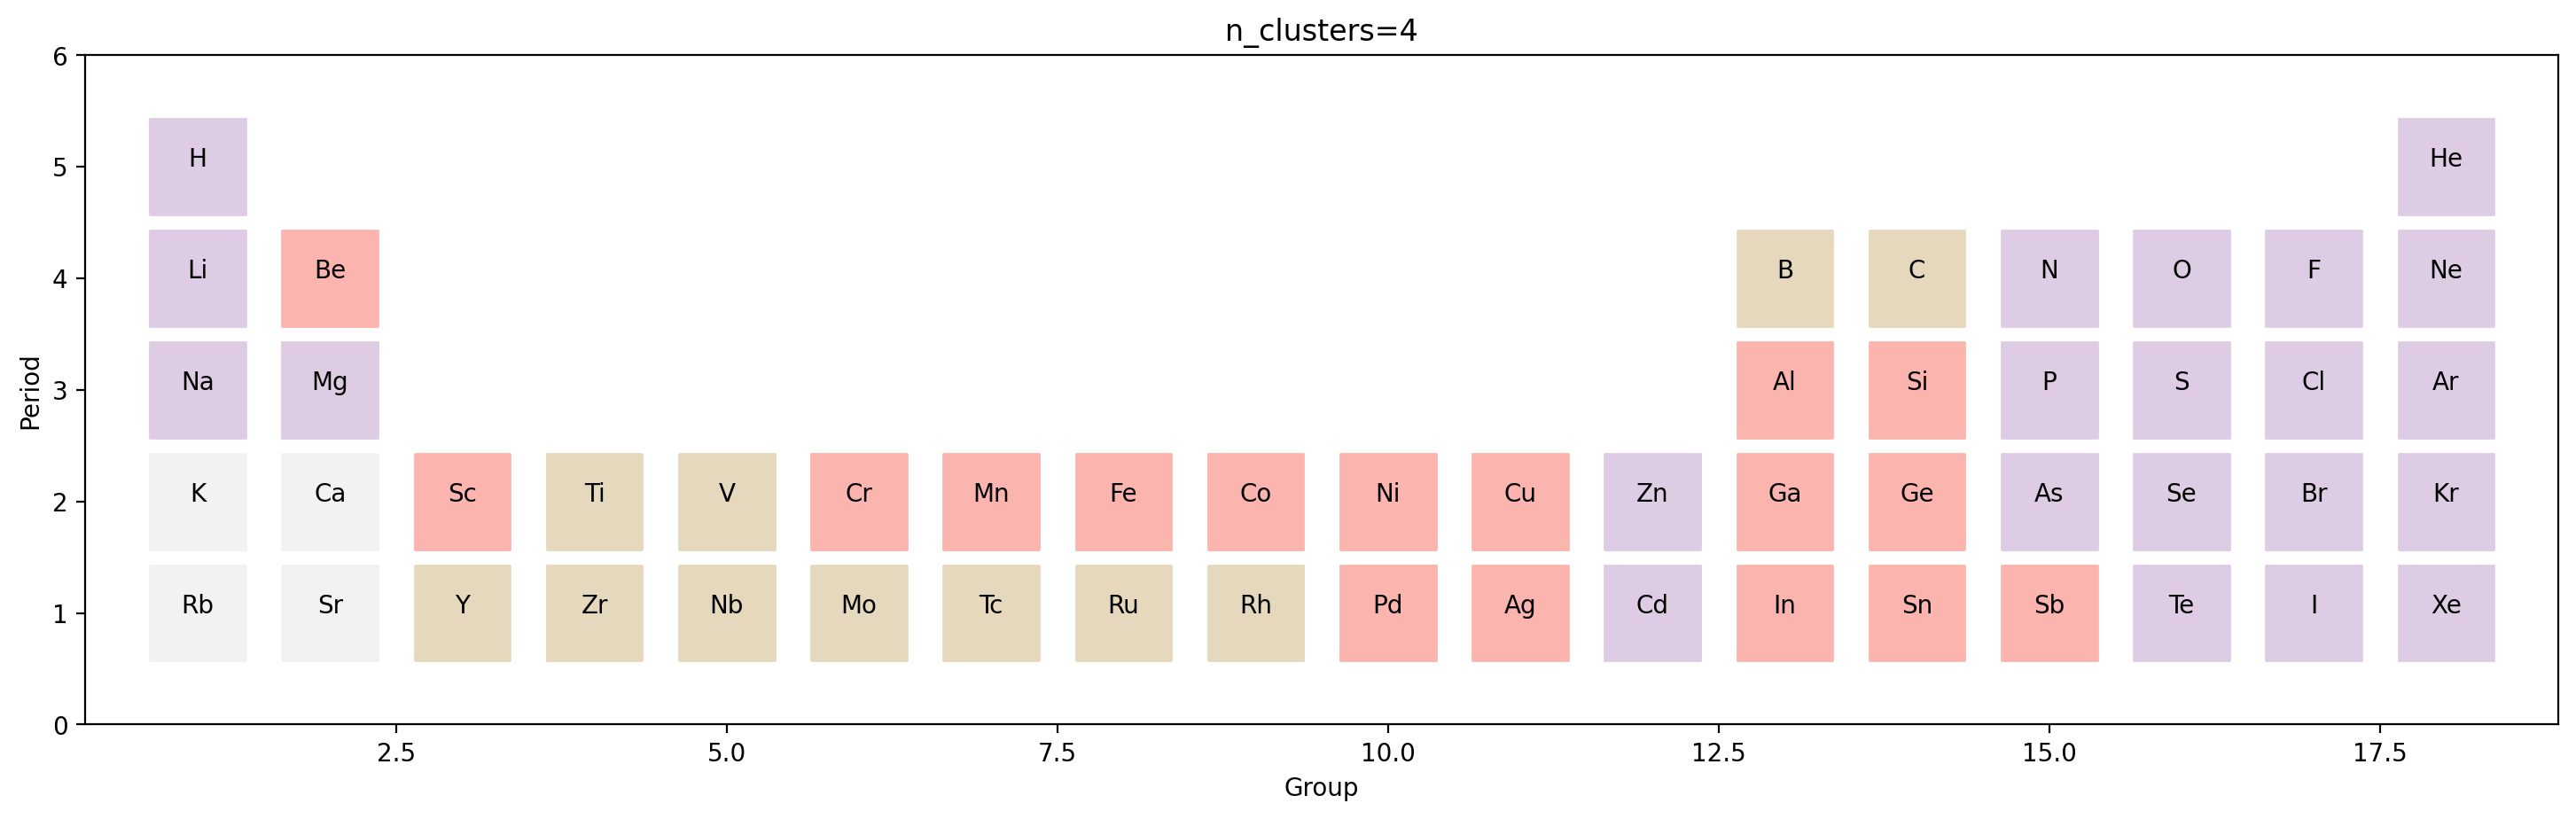

In [77]:
kmeans = KMeans(n_clusters=4, random_state=123)
k_clustering = kmeans.fit(data)
visualize_ptable(k_clustering.labels_)
plt.title("n_clusters=4")

Text(0.5, 1.0, 'K-Means, n_clusters = 9')

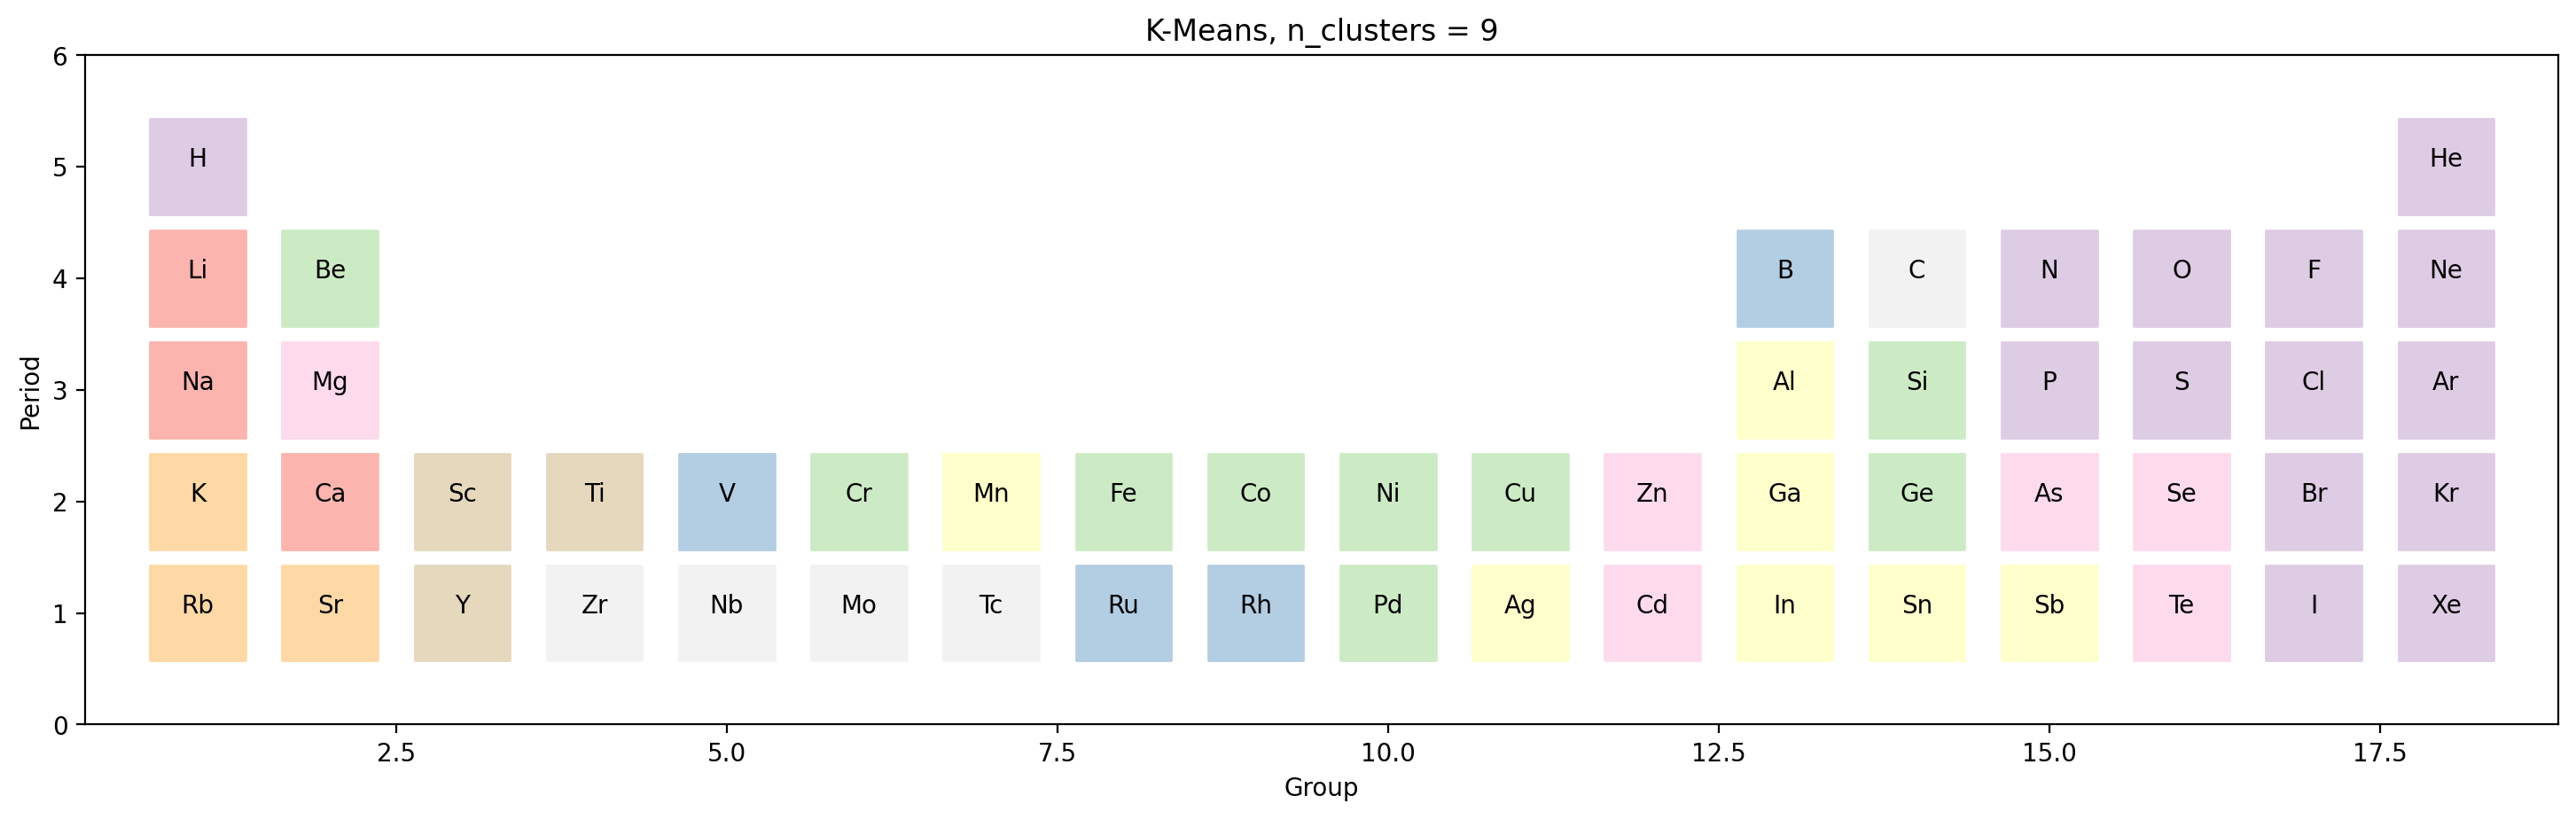

In [78]:
kmeans = KMeans(n_clusters=9, random_state=123)
k_clustering = kmeans.fit(data)
visualize_ptable(k_clustering.labels_)
plt.title("K-Means, n_clusters = 9")

Text(0.5, 1.0, 'K-Means, n_clusters = 3')

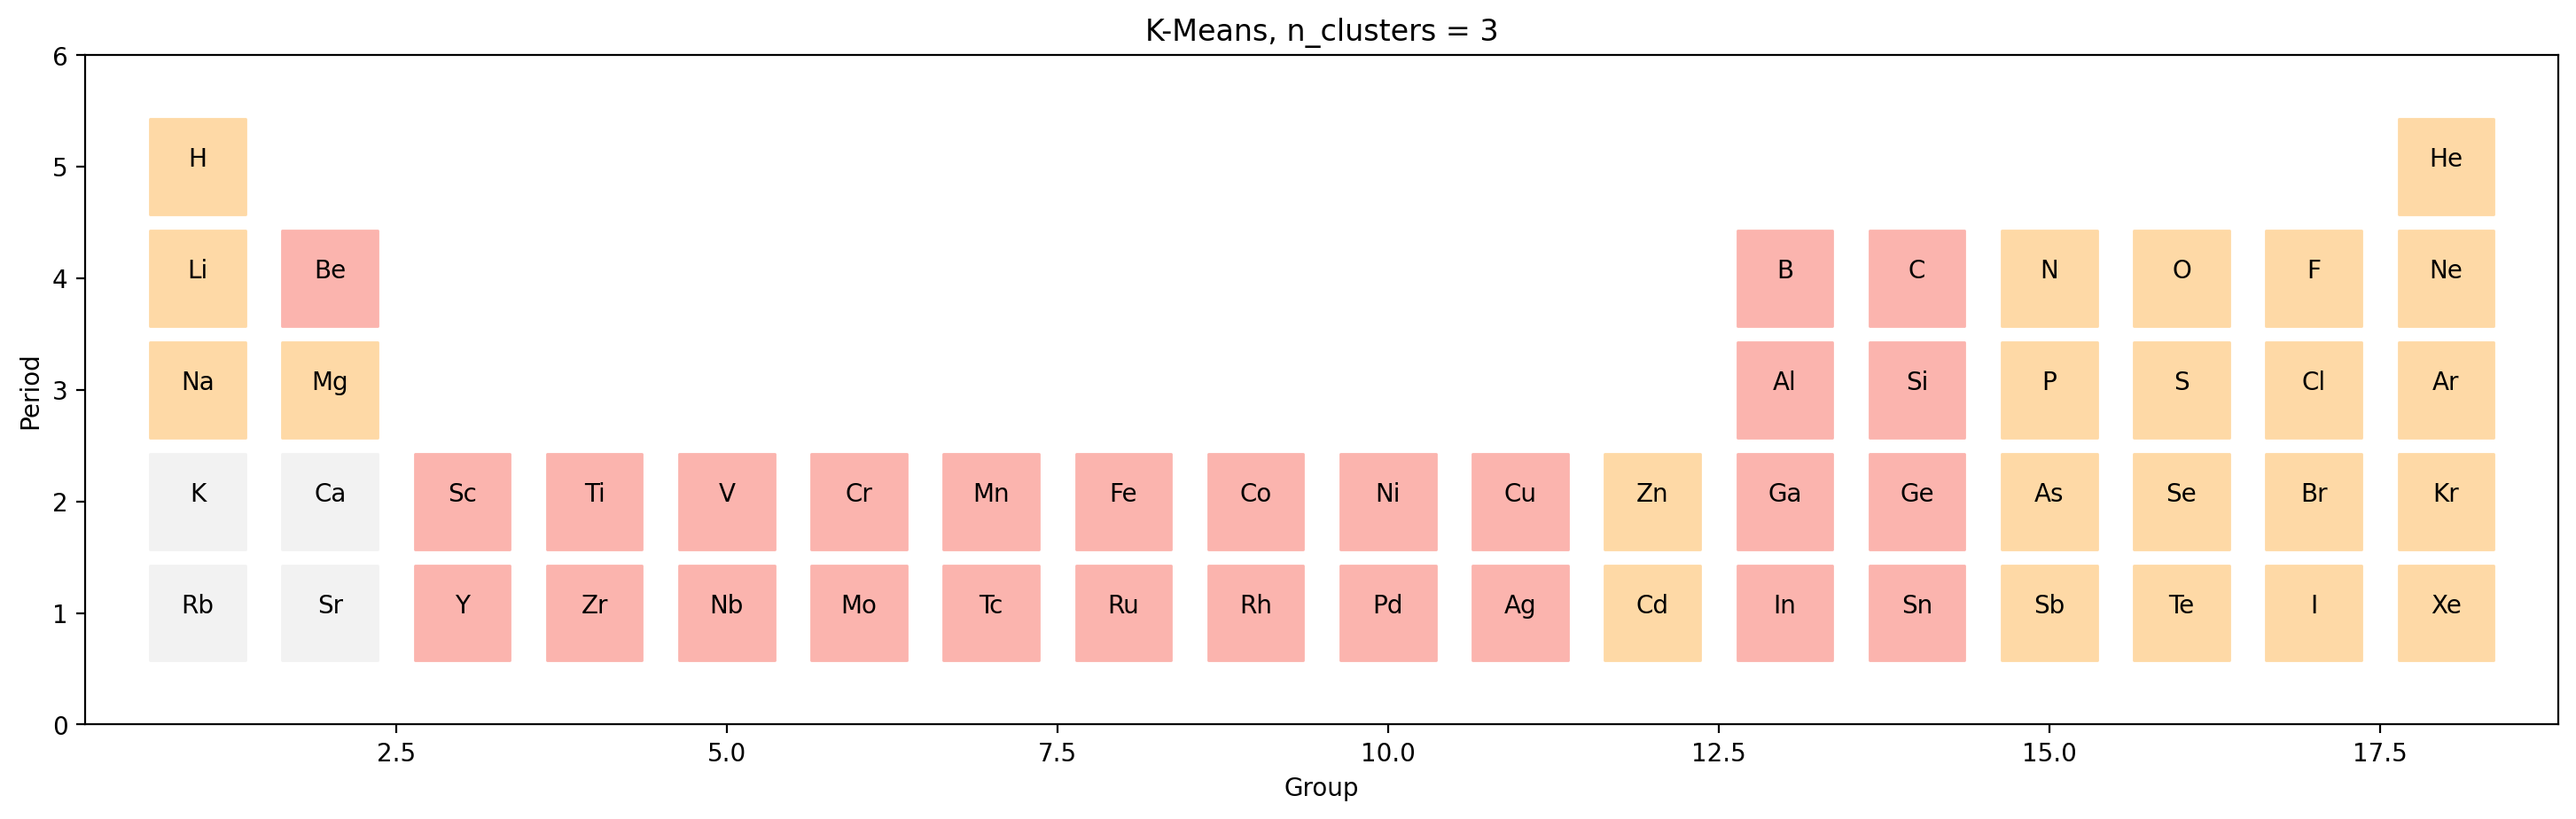

In [79]:
kmeans = KMeans(n_clusters=3, random_state=123)
k_clustering = kmeans.fit(data)
visualize_ptable(k_clustering.labels_)
plt.title("K-Means, n_clusters = 3")